## Comparing the Computational Impact of adding the additional elements used by SWMMIN's user model

In [14]:
import pyswmm                   # Library for working with SWMM (Storm Water Management Model)
import pandas as pd             # Data manipulation and analysis library
import numpy as np              
import pathlib                  # Object-oriented filesystem paths
import matplotlib as mpl        
import matplotlib.pyplot as plt  
import glob

# Set font properties for matplotlib
font = {'family' : 'Serif',
        'weight' : 'bold', 
        'size'   : 10}
mpl.rc('font', **font)  # Apply font settings to matplotlib
mpl.rc('font', **font)  # Apply font settings to matplotlib (duplicate line, can be removed)
mpl.rcParams['figure.dpi'] = 600  # Set the resolution of the figure
mpl.rcParams["mathtext.fontset"] = "dejavuserif"  # Set the font for math text

In [54]:
# Directory for network inp files
dir = pathlib.Path('../../Networks/Modena/Timing Test/')
inp_files = glob.glob(str(dir / '*.inp'))  # Get all inp files in the directory
inp_files.sort()
runs = []
for file in inp_files:
    splits = file.split('_')
    if 'Campisano' in file:
        result = '_'.join(splits[-2:])
    else:
        result = splits[-1]
    runs.append(result.split('.')[0]) 
runs

['100m',
 '100m_Campisano',
 '10m',
 '10m_Campisano',
 '250m',
 '250m_Campisano',
 '50m',
 '50m_Campisano']

In [55]:
import time
execution_times = []
timing_iterations = 5 # Number of times to run the simulation for each network
stp=0       #steps counter
every=10000  #Interval of printing current time

# Running the simulation for each network
for filename in inp_files:
    start_time = time.time()
    for iteration in range(timing_iterations):
        sim = pyswmm.Simulation(inputfile=str(filename), outputfile=str(filename).replace('.inp','.out'))
        
        with sim as sim:
            for step in sim:
                if stp%every==0:
                    print('Current Time is >> ',sim.current_time)
                stp+=1
                pass
    execution_times.append(time.time()-start_time)

Current Time is >>  2022-05-18 00:00:01
Current Time is >>  2022-05-18 01:23:21
Current Time is >>  2022-05-18 02:46:41
Current Time is >>  2022-05-18 04:10:01
Current Time is >>  2022-05-18 05:33:21
Current Time is >>  2022-05-18 06:56:41
Current Time is >>  2022-05-18 08:20:01
Current Time is >>  2022-05-18 09:43:21
Current Time is >>  2022-05-18 11:06:41
Current Time is >>  2022-05-18 12:30:01
Current Time is >>  2022-05-18 13:53:21
Current Time is >>  2022-05-18 15:16:41
Current Time is >>  2022-05-18 16:40:01
Current Time is >>  2022-05-18 18:03:21
Current Time is >>  2022-05-18 19:26:41
Current Time is >>  2022-05-18 20:50:01
Current Time is >>  2022-05-18 22:13:21
Current Time is >>  2022-05-18 23:36:41
Current Time is >>  2022-05-18 01:01:01
Current Time is >>  2022-05-18 02:24:21
Current Time is >>  2022-05-18 03:47:41
Current Time is >>  2022-05-18 05:11:01
Current Time is >>  2022-05-18 06:34:21
Current Time is >>  2022-05-18 07:57:41
Current Time is >>  2022-05-18 09:21:01


In [56]:
execution_times = [time / timing_iterations for time in execution_times]

In [57]:
executions_dict = dict(zip(runs, execution_times))
executions_dict

{'100m': 305.1181532382965,
 '100m_Campisano': 172.08393659591675,
 '10m': 1541.2793108463288,
 '10m_Campisano': 1287.3894715309143,
 '250m': 217.5364082336426,
 '250m_Campisano': 102.48127503395081,
 '50m': 445.4254693031311,
 '50m_Campisano': 293.68530888557433}

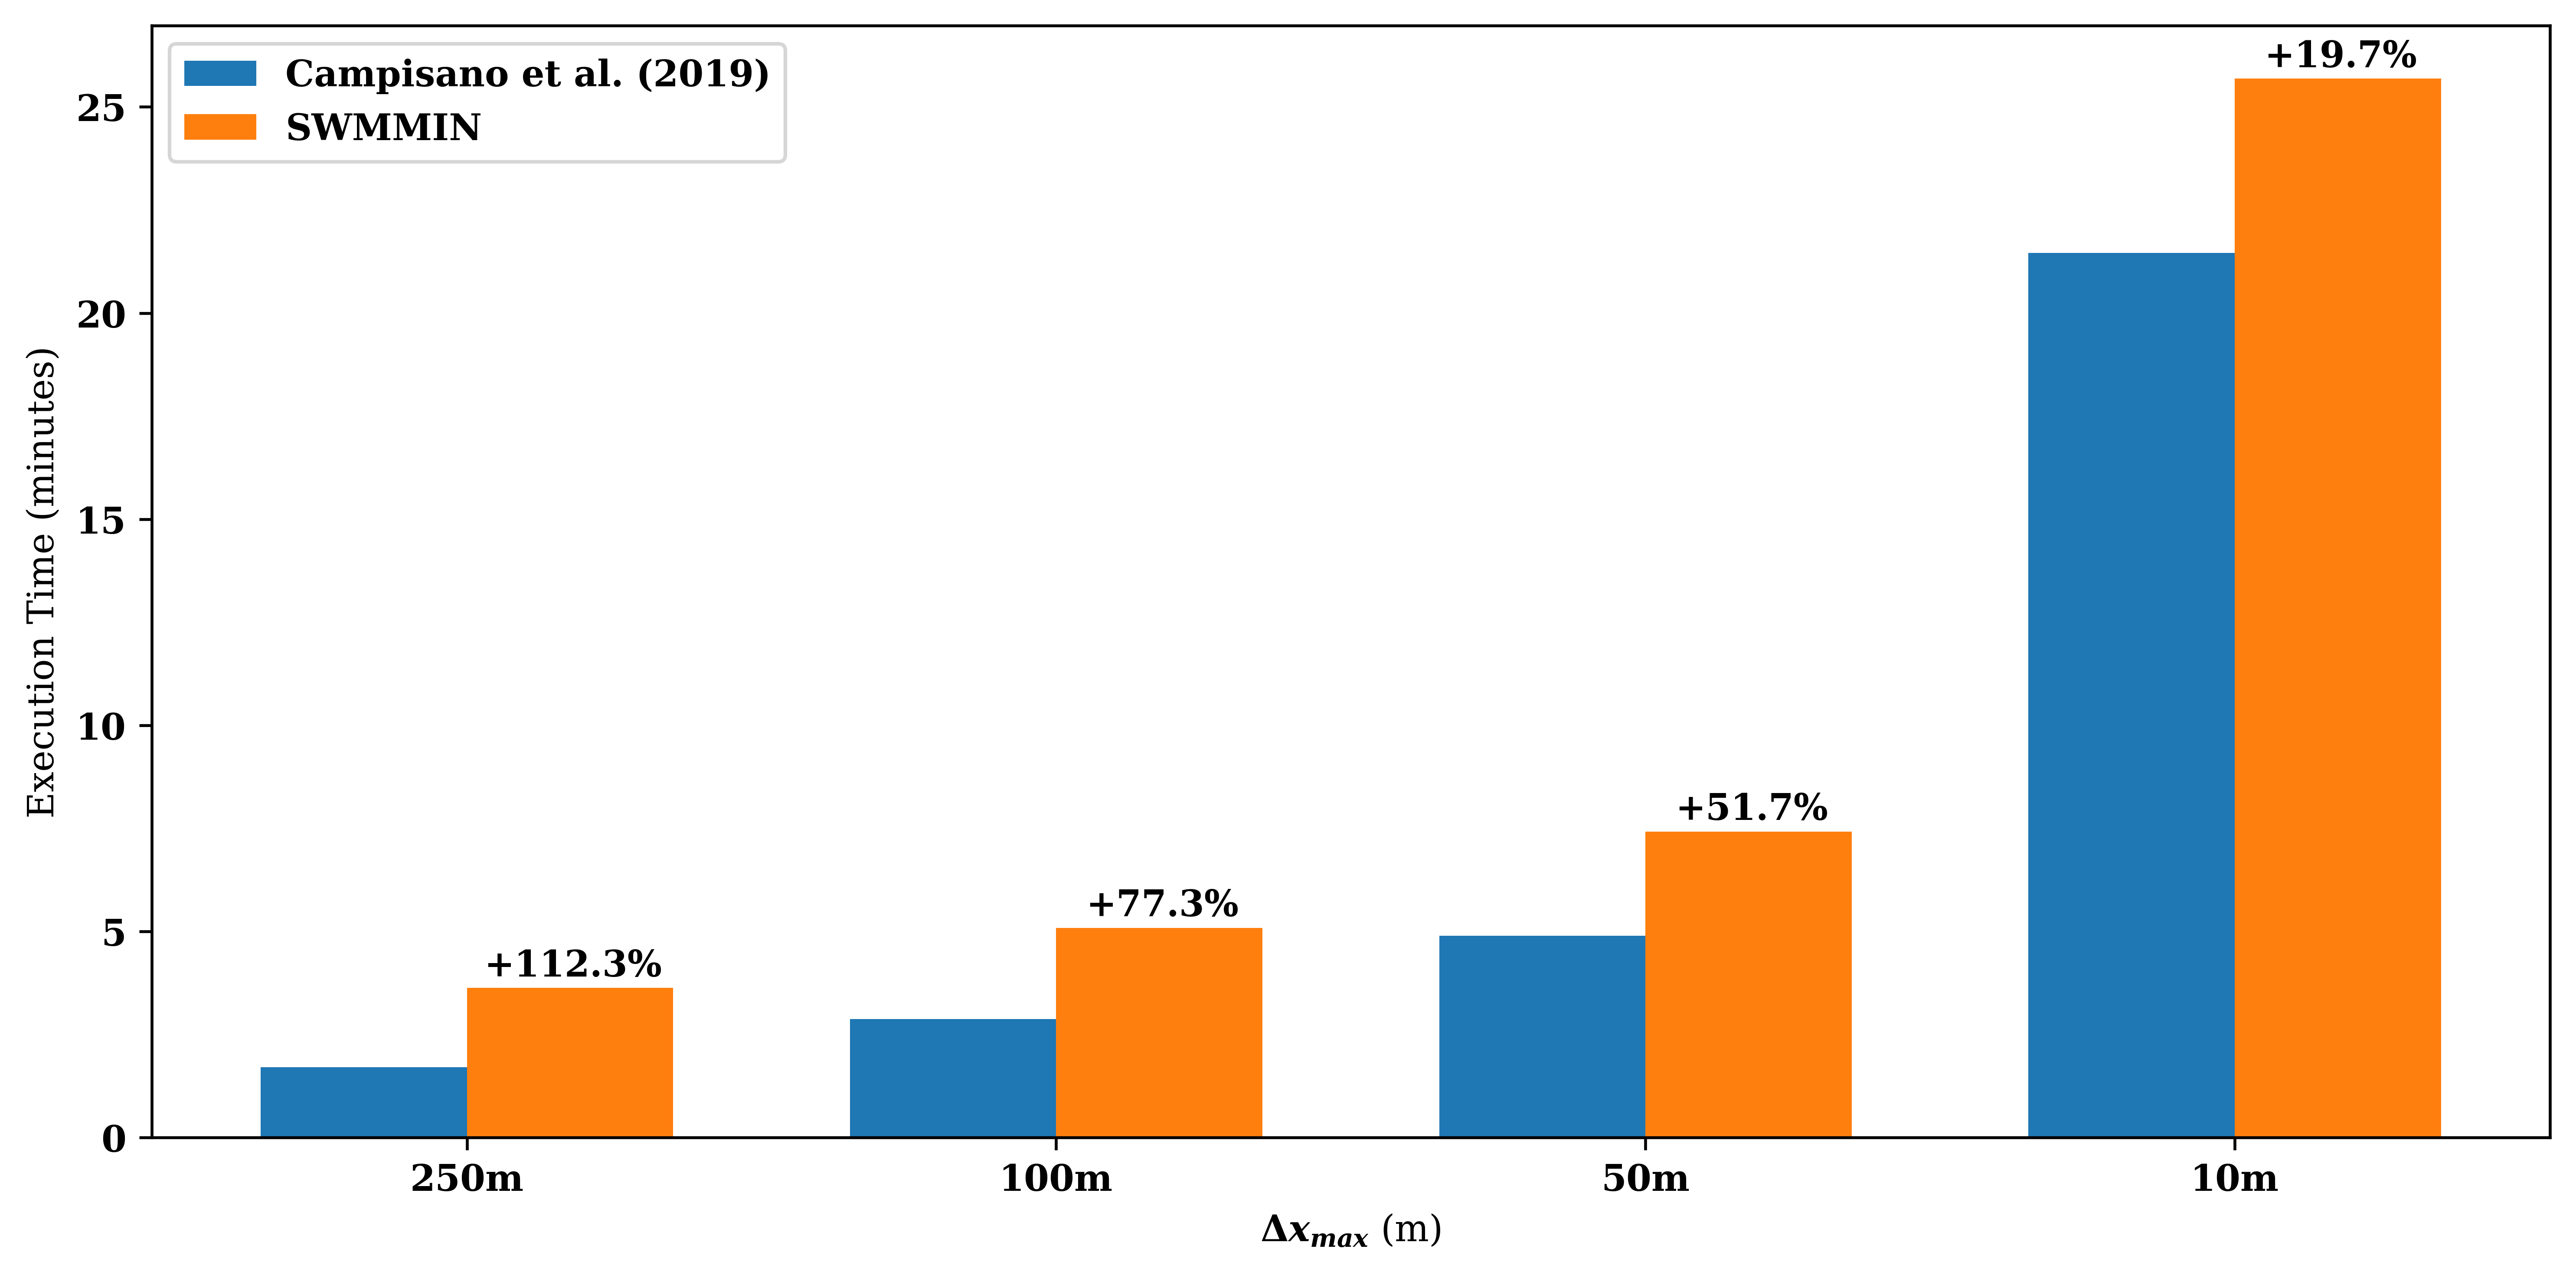

In [59]:
fig, ax  =plt.subplots(figsize=(10,5))
# Separate the keys into two groups: with and without 'Campisano'
keys_with_campisano = [key for key in executions_dict.keys() if 'Campisano' in key]
keys_without_campisano = [key.replace('_Campisano', '') for key in keys_with_campisano]

# Sort the keys based on the numeric part of the key in descending order
keys_with_campisano.sort(key=lambda x: int(x.split('_')[0].replace('m', '')), reverse=True)
keys_without_campisano.sort(key=lambda x: int(x.replace('m', '')), reverse=True)

# Get the values for both groups
values_with_campisano = [executions_dict[key] / 60 for key in keys_with_campisano]
values_without_campisano = [executions_dict[key] / 60 for key in keys_without_campisano]

# Create the bar chart
x = np.arange(len(keys_without_campisano))  # the label locations
width = 0.35  # the width of the bars

rects2 = ax.bar(x - width/2, values_with_campisano, width, label='Campisano et al. (2019)')
rects1 = ax.bar(x + width/2, values_without_campisano, width, label='SWMMIN')

# Annotate each pair with the percent increase between them
for i in range(len(x)):
    percent_increase = ((values_without_campisano[i] - values_with_campisano[i]) / values_with_campisano[i]) * 100
    ax.annotate(f'+{percent_increase:.1f}%', 
                xy=(x[i] +0.18, values_without_campisano[i] +0.1 ),  # Position the annotation above the bar
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel(r'$\Delta x_{max}$ (m)')
ax.set_ylabel('Execution Time (minutes)')
# ax.set_ylim(0,16)
# ax.set_title('Execution Time by Network and Campisano')
ax.set_xticks(x)
ax.set_xticklabels(keys_without_campisano)
ax.legend()

fig.tight_layout()
plt.show()